IMPORT LIBRARIES

In [1]:
from data_visualizer import DataVisualizer
#!pip install ultralytics
#!pip install roboflow
from roboflow import Roboflow
from ultralytics import YOLO
import torch
import shutil
import sys
sys.path.append('../')
from api_key import dataset_key

LOAD ROBOFLOW DATASET

In [2]:
rf = Roboflow(api_key=dataset_key)
project = rf.workspace("computervision-jifim").project("hockey-playerdetection")
version = project.version(6)
dataset = version.download("yolov9")             

loading Roboflow workspace...
loading Roboflow project...


INSPECT DATASET

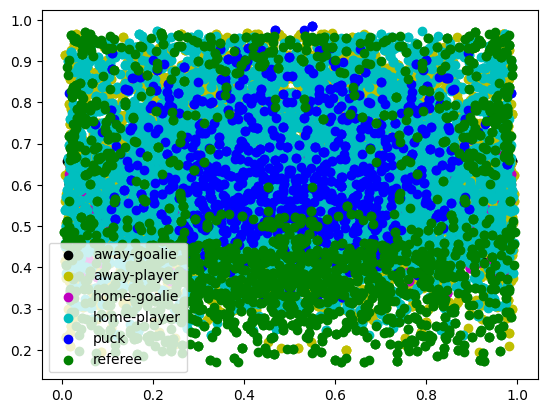

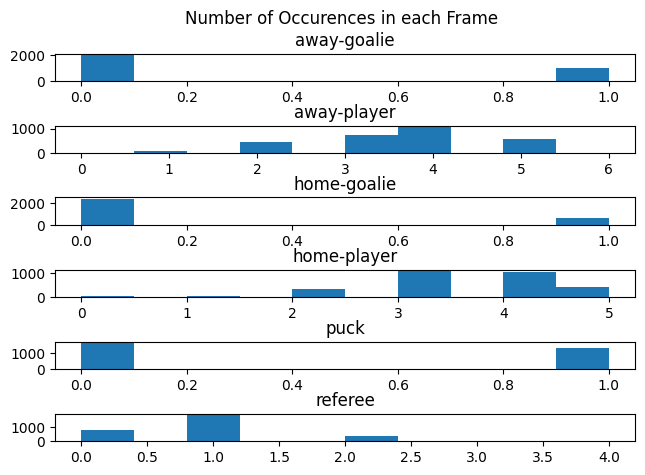

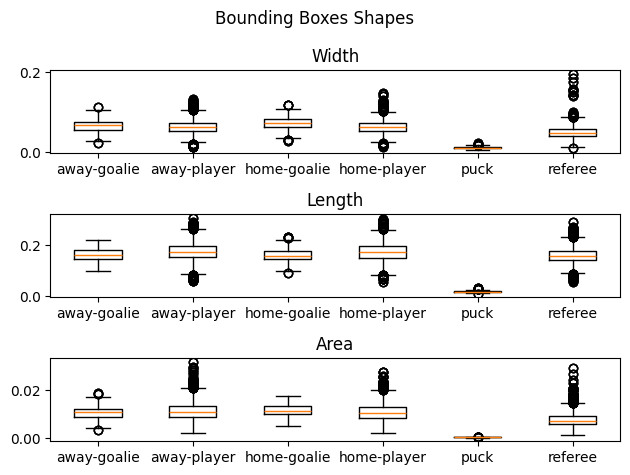

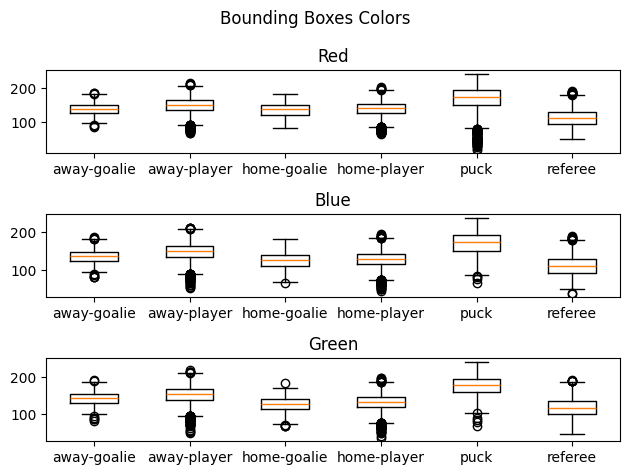

In [4]:
data = DataVisualizer(dataset.location)
data.plotBoxLocation('train')
data.plotBoxCounts('train')
data.plotBoxSize('train')
data.plotBoxColor('train')

NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0529_jpg.rf.a8cccb6b35add33b35cb0930fd44d090.txt
(145, 22, 3)
(103, 19, 3)
(110, 27, 3)
(94, 36, 3)
(137, 36, 3)
(9, 6, 3)
NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0530_jpg.rf.643e2a94da6398873ba39b26dc46f69e.txt
(154, 41, 3)
(116, 30, 3)
(135, 47, 3)
(100, 27, 3)
NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0531_jpg.rf.e65452b6531b2edf8d516831d832900e.txt
(108, 23, 3)
(148, 41, 3)
(115, 29, 3)
(156, 47, 3)
NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0532_jpg.rf.52efb3d467b723bd5eb606c26fbc1d5f.txt
(168, 39, 3)
(119, 37, 3)
(142, 53, 3)
(113, 38, 3)
NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0535_jpg.rf.5750c8e7025bf010ad4675f77ae0081a.txt
(156, 60, 3)
(133, 46, 3)
(102, 43, 3)
(13, 6, 3)
NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0536_jpg.rf.ed9f82f5891f827de698b7e410494ae0.txt
(8, 6, 3)
(111, 36, 3)
(123, 34, 3)
(149, 54, 3)

Mean of empty slice.
invalid value encountered in divide


(114, 67, 3)
(154, 45, 3)
(9, 7, 3)
NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0847_jpg.rf.cff37c98ba65e5312d5b80ee96c1f1a0.txt
(121, 32, 3)
(84, 55, 3)
(89, 56, 3)
(108, 43, 3)
(153, 58, 3)
(138, 52, 3)
(131, 42, 3)
(115, 31, 3)
(122, 26, 3)
(107, 22, 3)
NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0848_jpg.rf.804fd2864bc6df6473ccd247a8d4a788.txt
(135, 35, 3)
(121, 38, 3)
(108, 26, 3)
(140, 44, 3)
(111, 47, 3)
(122, 42, 3)
(86, 47, 3)
(117, 28, 3)
(165, 45, 3)
(150, 57, 3)
NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0924_jpg.rf.9d54ddb4d575c23877cc58bd041af96c.txt
(134, 32, 3)
(93, 40, 3)
(124, 40, 3)
(78, 28, 3)
(79, 39, 3)
(104, 31, 3)
(103, 52, 3)
(125, 34, 3)
(114, 18, 3)
NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0925_jpg.rf.b084019052127203bc9b0df9d94950e5.txt
(89, 27, 3)
(79, 33, 3)
(136, 37, 3)
(90, 67, 3)
(121, 38, 3)
(132, 24, 3)
NHL-Game-3-Highlights-Bruins-vs_-Maple-Leafs-April-24-2024_mp4-0926_jp

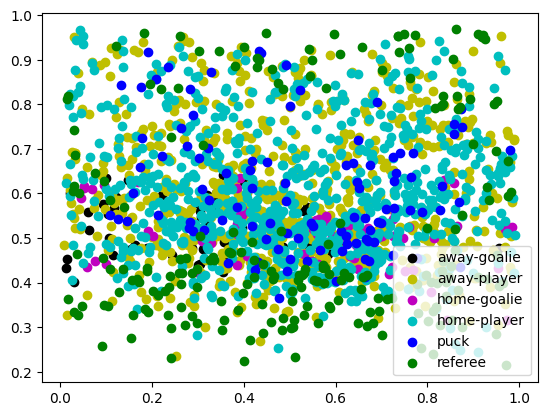

In [3]:
data = DataVisualizer(dataset.location)
data.plotBoxLocation('valid')
# data.plotBoxCounts('valid')
# data.plotBoxSize('valid')
# data.plotBoxColor('valid')

TRAIN YOLO ON DATASET

In [4]:
#clear cache
torch.cuda.empty_cache()

In [ ]:
#set path to dataset
path = dataset.location+'/data.yaml'

In [ ]:
#calculate optimal hyperparameters
model = YOLO("yolov10l.pt")
epochs = 25
iterations = 100

calc_optimal_hyper_param = True
if (calc_optimal_hyper_param):
    model.tune(data=path, 
               epochs=epochs, 
               iterations=iterations, 
               optimizer="AdamW")

Tuner: Initialized Tuner instance with 'tune_dir=runs\detect\tune'
Tuner:  Learn about tuning at https://docs.ultralytics.com/guides/hyperparameter-tuning
Tuner: Starting iteration 1/5 with hyperparameters: {'lr0': 0.01, 'lrf': 0.01, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'bgr': 0.0, 'mosaic': 1.0, 'mixup': 0.0, 'copy_paste': 0.0}


In [ ]:
#train model
epochs = 100
image_size = 640
hyperparameter_path = "./runs/detect/tune/best_hyperparameters.yaml"
print(hyperparameter_path)

if (calc_optimal_hyper_param):
    results = model.train(data=path, epochs=epochs, imgsz=image_size, cfg=hyperparameter_path)
else:
    results = model.train(data=path, epochs=epochs, imgsz=image_size)